# Final Project

This project focuses on analyzing Airbnb property performance data in the United States over the last 12 months (April 2023 - March 2024).
The dataset includes key metrics such as Average Daily Rates (ADRs), Revenue, Occupancy rates, and property details including # of bedrooms, # of bathrooms, State and Zipcode. The objective is to provide insights for investors seeking to identify the best places to invest in Airbnb properties based on their preferred metrics. By analyzing factors such as location, property amenities, and guest preferences, investors can optimize their investment strategy to maximize revenue and return on investment.

In [1]:
# Import necessary libraries

import pandas as pd

In [2]:
# Load the 1st dataset: annual performances (April 2023 - March 2024)

annual_df = pd.read_csv("/Users/clark/Desktop/ironhack/final-project/files/Spain-barcelona_LTM_Property_Extended_Match_2024-05-04.csv", delimiter = ",")
annual_df

/var/folders/6v/6h31846s6kl6bbfcc310q4gc0000gp/T/ipykernel_5722/772855532.py:3: DtypeWarning: Columns (23,45,51,59,60,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  annual_df = pd.read_csv("/Users/clark/Desktop/ironhack/final-project/files/Spain-barcelona_LTM_Property_Extended_Match_2024-05-04.csv", delimiter = ",")


,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-13966456,Double room in Gracia,Home,Shared room,2016-07-11,2024-04-21,Spain,Barcelona,Barcelona,NaN,...,NaN,"[""elevator"", ""breakfast"", ""wireless_internet"",...",NaN,False,NaN,NaN,13966456.0,4093742.0,NaN,NaN
1,ab-13966494,Room and bright and cosy flat in RAVAL,Rental unit,Private room,2016-07-11,2024-04-18,Spain,Barcelona,Barcelona,NaN,...,NaN,"[""elevator"", ""wireless_internet"", ""kitchen"", ""...",NaN,False,NaN,NaN,13966494.0,25531488.0,NaN,NaN
2,ab-13967114,Habitación compartida en Sants,Rental unit,Private room,2023-05-14,2024-01-22,Spain,Barcelona,Barcelona,NaN,...,NaN,"[""elevator"", ""breakfast"", ""wireless_internet"",...",NaN,False,NaN,NaN,13967114.0,5220741.0,NaN,NaN
3,ab-13969432,Acogedor apartamento. Luminoso y soleado.,Rental unit,Entire home/apt,2019-07-22,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,"[""elevator"", ""wireless_internet"", ""kitchen"", ""...",NaN,False,NaN,NaN,13969432.0,83279536.0,NaN,NaN
4,ab-13972983,Double room,Rental unit,Private room,2016-07-12,2024-04-17,Spain,Barcelona,Barcelona,NaN,...,NaN,"[""elevator"", ""wireless_internet"", ""kitchen"", ""...",NaN,False,NaN,NaN,13972983.0,32335069.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,ha-6715955ha,Tapioles - 2 bed apartment with big balcony in...,Apartment,Entire home/apt,NaN,2024-04-30,Spain,Barcelona,Barcelona,NaN,...,False,"[""Essentials|Linens provided"", ""Safety|Carbon ...",{},NaN,NaN,NaN,NaN,NaN,6715955ha,NaN
28668,ha-6724259ha,110m2 apartment to rent in Barcelona,Apartment,Entire home/apt,NaN,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,True,"[""Essentials|Wireless internet"", ""Essentials|F...",{},NaN,NaN,NaN,NaN,NaN,6724259ha,NaN
28669,ha-6726949ha,Cozy Gaudí Apartment in Gracia,Apartment,Entire home/apt,NaN,2024-05-01,Spain,Barcelona,Barcelona,NaN,...,True,"[""Essentials|Internet"", ""Essentials|Towels pro...",{},NaN,NaN,NaN,NaN,NaN,6726949ha,NaN
28670,ha-6776396ha,APTO. LOFT 2 - Apartment for 4 people in Barce...,Apartment,Entire home/apt,NaN,2024-03-20,Spain,Barcelona,Barcelona,NaN,...,True,"[""Entertainment|Television"", ""Entertainment|Sa...","{Downtown,Mountain}",NaN,NaN,NaN,NaN,NaN,6776396ha,NaN


In [3]:
# Create new columns for amenities
annual_df['Has Pool'] = annual_df['Amenities'].apply(lambda x: 'pool' in x)
annual_df['Has Air Conditioning'] = annual_df['Amenities'].apply(lambda x: any(keyword in x for keyword in ['air', 'conditioning', 'ac']))
annual_df['Has Parking'] = annual_df['Amenities'].apply(lambda x: 'parking' in x)
annual_df['Has Terrace'] = annual_df['Amenities'].apply(lambda x: any(keyword in x for keyword in ['terrace', 'patio']))

# Convert boolean values to True/False
annual_df['Has Pool'] = annual_df['Has Pool'].astype(bool)
annual_df['Has Air Conditioning'] = annual_df['Has Air Conditioning'].astype(bool)
annual_df['Has Parking'] = annual_df['Has Parking'].astype(bool)
annual_df['Has Terrace'] = annual_df['Has Terrace'].astype(bool)

annual_df


,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID,Has Pool,Has Air Conditioning,Has Parking,Has Terrace
0,ab-13966456,Double room in Gracia,Home,Shared room,2016-07-11,2024-04-21,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13966456.0,4093742.0,NaN,NaN,False,False,False,False
1,ab-13966494,Room and bright and cosy flat in RAVAL,Rental unit,Private room,2016-07-11,2024-04-18,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13966494.0,25531488.0,NaN,NaN,False,True,False,False
2,ab-13967114,Habitación compartida en Sants,Rental unit,Private room,2023-05-14,2024-01-22,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13967114.0,5220741.0,NaN,NaN,False,True,False,False
3,ab-13969432,Acogedor apartamento. Luminoso y soleado.,Rental unit,Entire home/apt,2019-07-22,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13969432.0,83279536.0,NaN,NaN,False,True,False,False
4,ab-13972983,Double room,Rental unit,Private room,2016-07-12,2024-04-17,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13972983.0,32335069.0,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,ha-6715955ha,Tapioles - 2 bed apartment with big balcony in...,Apartment,Entire home/apt,NaN,2024-04-30,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6715955ha,NaN,False,True,False,False
28668,ha-6724259ha,110m2 apartment to rent in Barcelona,Apartment,Entire home/apt,NaN,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6724259ha,NaN,False,True,False,False
28669,ha-6726949ha,Cozy Gaudí Apartment in Gracia,Apartment,Entire home/apt,NaN,2024-05-01,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6726949ha,NaN,False,True,False,False
28670,ha-6776396ha,APTO. LOFT 2 - Apartment for 4 people in Barce...,Apartment,Entire home/apt,NaN,2024-03-20,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6776396ha,NaN,False,True,False,False


## Data cleaning

In [4]:
# Create a copy

annual_df1 = annual_df.copy()

In [5]:
# The Listing Type contains the type of property, we only want to keep the "EntireHome/apt"

annual_df1["Listing Type"].value_counts()

Listing Type
Entire home/apt    15835
Private room       12491
Shared room          206
Hotel room           140
Name: count, dtype: int64

In [6]:
# Remove Private room, share room or hotel room

annual_df1 = annual_df1[annual_df1['Listing Type'] == 'Entire home/apt']
annual_df1

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID,Has Pool,Has Air Conditioning,Has Parking,Has Terrace
3,ab-13969432,Acogedor apartamento. Luminoso y soleado.,Rental unit,Entire home/apt,2019-07-22,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13969432.0,83279536.0,NaN,NaN,False,True,False,False
6,ab-13979120,Barceloneta cozy apartment,Condo,Entire home/apt,2017-05-24,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13979120.0,71922291.0,2998148,NaN,False,True,False,False
10,ab-13986464,Diputación Central Eixample Left,Rental unit,Entire home/apt,2016-07-12,2023-06-07,Spain,Barcelona,Barcelona,NaN,...,NaN,HUTB-008013,13986464.0,1391607.0,NaN,NaN,False,True,False,False
13,ab-13992866,Sant Antoni apartment,Rental unit,Entire home/apt,2017-05-24,2024-04-27,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,13992866.0,83548422.0,NaN,NaN,False,True,True,True
16,ab-14004632,"Stylish, centrally located, shared terrace",Serviced apartment,Entire home/apt,2016-07-13,2024-05-03,Spain,Barcelona,Barcelona,NaN,...,NaN,HUTB-004930,14004632.0,5878688.0,NaN,NaN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,ha-6715955ha,Tapioles - 2 bed apartment with big balcony in...,Apartment,Entire home/apt,NaN,2024-04-30,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6715955ha,NaN,False,True,False,False
28668,ha-6724259ha,110m2 apartment to rent in Barcelona,Apartment,Entire home/apt,NaN,2024-04-29,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6724259ha,NaN,False,True,False,False
28669,ha-6726949ha,Cozy Gaudí Apartment in Gracia,Apartment,Entire home/apt,NaN,2024-05-01,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6726949ha,NaN,False,True,False,False
28670,ha-6776396ha,APTO. LOFT 2 - Apartment for 4 people in Barce...,Apartment,Entire home/apt,NaN,2024-03-20,Spain,Barcelona,Barcelona,NaN,...,NaN,NaN,NaN,NaN,6776396ha,NaN,False,True,False,False


In [7]:
# The Property ID is ab-number or ha-number, we only want to keep the number as the ID and change the dtype from object to integer

annual_df1['Property ID'] = annual_df1['Property ID'].str.extract(r'(\d+)')
annual_df1['Property ID'] = annual_df1['Property ID'].astype(int)

In [8]:
# Create a copy

annual_df2 = annual_df1.copy()

In [9]:
annual_df2.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

In [10]:
# We are going to drop columns that we don't need in our dataset

annual_df2.drop(columns=['Listing Title', 'Property Type', 'Listing Type', 'Created Date', 'Last Scraped Date', 'Country', 'State', 'City', 'Zipcode', 'Metropolitan Statistical Area', 'Currency Native', 'Average Daily Rate (USD)', 'Annual Revenue LTM (USD)', 'Number of Bookings LTM', 'Number of Reviews', 'Max Guests', 'Calendar Last Updated', 'Response Rate', 'Airbnb Response Time (Text)', 'HomeAway Premier Partner', 'Security Deposit (USD)', 'Security Deposit (Native)', 'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)', 'Extra People Fee (Native)', 'Published Nightly Rate (USD)', 'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)', 'Check-in Time', 'Checkout Time', 'Count Reservation Days LTM', 'Count Available Days LTM', 'Count Blocked Days LTM', 'Number of Photos', 'Instantbook Enabled', 'Listing URL', 'Listing Main Image URL', 'Listing Images', 'Exact Location', 'Overall Rating', 'Airbnb Communication Rating', 'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Value Rating', 'Integrated Property Manager', 'Amenities', 'HomeAway Location Type', 'Airbnb Property Plus', 'Airbnb Home Collection', 'License', 'Airbnb Property ID', 'Airbnb Host ID', 'HomeAway Property ID', 'Cancellation Policy', 'HomeAway Property Manager ID'], inplace=True)

In [11]:
# We are going to change the name of some of the columns

annual_df2.rename(columns={'Average Daily Rate (Native)': 'Average Daily Rate', 'Annual Revenue LTM (Native)': 'Annual Revenue', 'Occupancy Rate LTM': 'Occupancy Rate'}, inplace=True)

In [12]:
# Create a copy

annual_df3 = annual_df2.copy()

In [13]:
# We are going to focus on cleaning the data from the annual_df dataset

annual_df3

,Property ID,Neighborhood,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace
3,13969432,"Sant Pere, Santa Caterina i la Ribera",109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,False,False,True,False,False
6,13979120,la Barceloneta,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,True,False,True,False,False
10,13986464,la Nova Esquerra de l'Eixample,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,False,False,True,False,False
13,13992866,Sant Antoni,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,False,False,True,True,True
16,14004632,la Dreta de l'Eixample,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,6715955,el Poble Sec,NaN,NaN,0.481,2,1.0,NaN,0.0,41.373940,2.164641,NaN,False,True,False,False
28668,6724259,la Sagrada Família,NaN,NaN,0.769,3,2.0,NaN,1.0,41.404500,2.172212,NaN,False,True,False,False
28669,6726949,la Vila de Gràcia,NaN,NaN,0.775,2,1.0,NaN,1.0,41.408594,2.159238,NaN,False,True,False,False
28670,6776396,Sant Gervasi - Galvany,NaN,NaN,NaN,2,3.0,NaN,0.0,41.398920,2.146227,NaN,False,True,False,False


In [14]:
# Check Nans

annual_df3.isnull().sum()

Property ID                0
Neighborhood               6
Average Daily Rate      4631
Annual Revenue          1242
Occupancy Rate          3786
Bedrooms                   0
Bathrooms                  0
Airbnb Superhost        2378
Minimum Stay              39
Latitude                   0
Longitude                  0
Pets Allowed            1098
Has Pool                   0
Has Air Conditioning       0
Has Parking                0
Has Terrace                0
dtype: int64

In [15]:
# We are going to change the Average Daily Rate NaN rows 0

annual_df3['Average Daily Rate'].fillna(0, inplace=True)

In [16]:
# We are going to change the Annual Revenue NaN rows 0

annual_df3['Annual Revenue'].fillna(0, inplace=True)

In [17]:
# We are going to change the Occupancy NaN rows 0

annual_df3['Occupancy Rate'].fillna(0, inplace=True)

In [18]:
# We are going to change the Neighborhood NaN rows the majority

annual_df3['Neighborhood'].value_counts()

Neighborhood
la Dreta de l'Eixample                   1956
Sant Pere, Santa Caterina i la Ribera    1210
el Raval                                 1079
la Sagrada Família                       1054
el Barri Gòtic                            981
                                         ... 
la Guineueta                                4
el Bon Pastor                               4
Canyelles                                   3
la Clota                                    3
Torre Baró                                  3
Name: count, Length: 68, dtype: int64

In [19]:
annual_df3['Neighborhood'].fillna("la Dreta de l'Eixample", inplace=True)

In [20]:
annual_df3['Airbnb Superhost'].value_counts()

Airbnb Superhost
False    10969
True      2488
Name: count, dtype: int64

In [21]:
annual_df3['Airbnb Superhost'].fillna(False, inplace=True)

In [22]:
annual_df3['Airbnb Superhost'] = annual_df3['Airbnb Superhost'].astype(bool)

In [23]:
# We are going to change the Pets Allowed NaN rows the majority

annual_df3["Pets Allowed"].value_counts()

Pets Allowed
False    11809
True      2928
Name: count, dtype: int64

In [24]:
annual_df3['Pets Allowed'].fillna(False, inplace=True)

In [25]:
annual_df3['Pets Allowed'] = annual_df3['Pets Allowed'].astype(bool)

In [26]:
# We are going to change the Minimum Stay NaN rows the majority

annual_df3["Minimum Stay"].value_counts()

Minimum Stay
1.0      4419
32.0     2843
3.0      2532
31.0     1979
2.0      1792
         ... 
85.0        1
270.0       1
183.0       1
36.0        1
96.0        1
Name: count, Length: 79, dtype: int64

In [27]:
annual_df3['Minimum Stay'].fillna(1.0, inplace=True)

In [28]:
annual_df3.dtypes

Property ID               int64
Neighborhood             object
Average Daily Rate      float64
Annual Revenue          float64
Occupancy Rate          float64
Bedrooms                  int64
Bathrooms               float64
Airbnb Superhost           bool
Minimum Stay            float64
Latitude                float64
Longitude               float64
Pets Allowed               bool
Has Pool                   bool
Has Air Conditioning       bool
Has Parking                bool
Has Terrace                bool
dtype: object

In [29]:
neighborhood = pd.read_excel("/Users/clark/Desktop/ironhack/final-project/files/neighborhoods.xlsx")
neighborhood

,Neighborhood,Seasonality
0,Can Baró,0.53
1,Canyelles,0.12
2,Diagonal Mar i el Front Marítim del Poblenou,0.46
3,el Baix Guinardó,0.31
4,el Barri Gòtic,0.72
...,...,...
63,Torre Baró,0.06
64,Vallcarca i els Penitents,0.18
65,"Vallvidrera, el Tibidabo i les Planes",0.21
66,Verdun,0.06


In [30]:
annual_df3 = pd.merge(annual_df3, neighborhood, on='Neighborhood', how='left')

## EDA

In [31]:
# Import necessary libraries

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Create a copy

annual_df4 = annual_df3.copy()

In [33]:
annual_df4.shape

(15835, 17)

In [34]:
annual_df4.describe()

,Property ID,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Minimum Stay,Latitude,Longitude,Seasonality
count,1.583500e+04,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000
mean,3.841641e+17,178.739751,26384.043701,0.557942,2.082223,1.416198,14.547206,41.391657,2.167584,0.635387
std,4.446817e+17,286.608442,38554.492280,0.381720,1.236853,0.806664,24.825328,0.013090,0.017683,0.163900
min,1.747500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.349834,2.077490,0.030000
25%,1.977931e+07,0.000000,0.000000,0.069000,1.000000,1.000000,1.000000,41.381247,2.157200,0.530000
50%,4.981867e+07,146.180000,5534.000000,0.691000,2.000000,1.000000,3.000000,41.389770,2.168371,0.690000
75%,8.563613e+17,243.840000,45344.000000,0.895000,3.000000,2.000000,31.000000,41.400999,2.178283,0.740000
max,1.146133e+18,10878.860000,602386.000000,1.000000,50.000000,50.000000,365.000000,41.458057,2.227710,0.840000


In [35]:
# Separate the numerical from the categorical columns

numerical_columns = annual_df4.select_dtypes("number")
categorical_columns = annual_df4.select_dtypes("object")

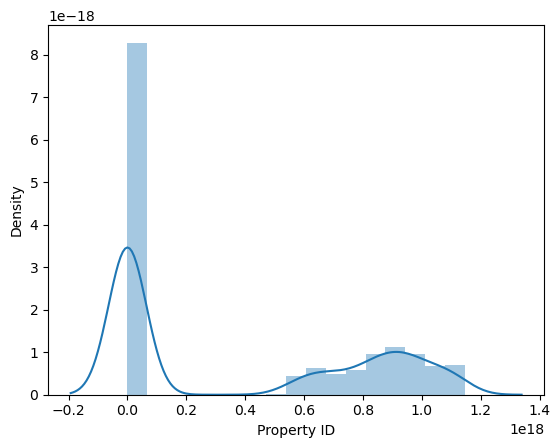

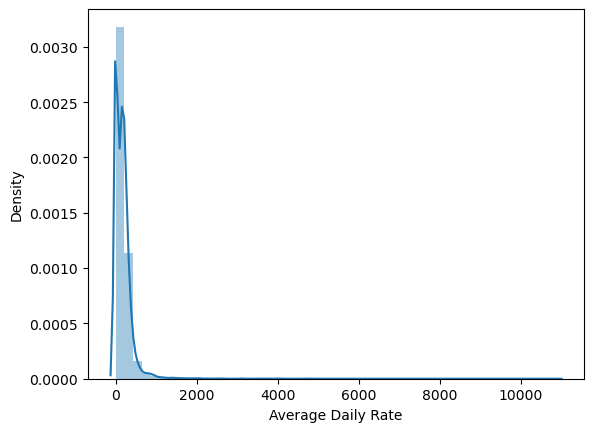

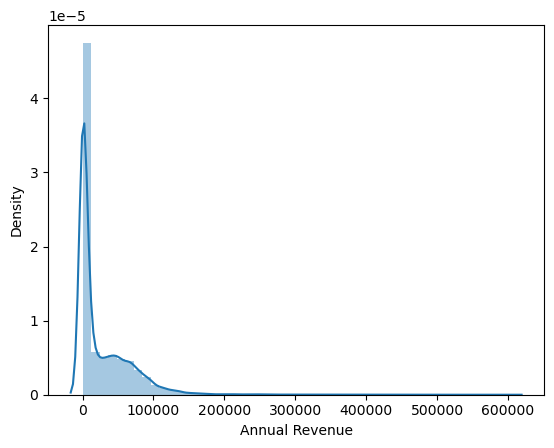

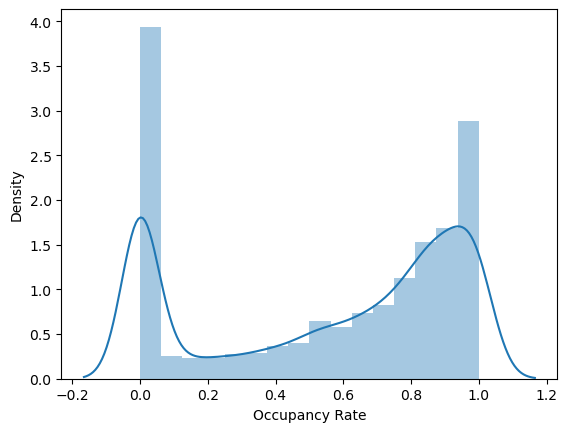

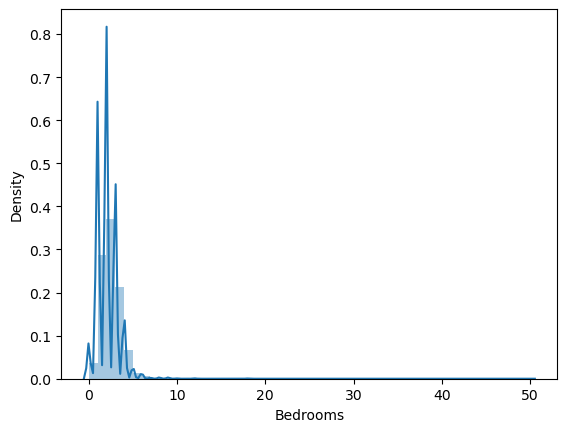

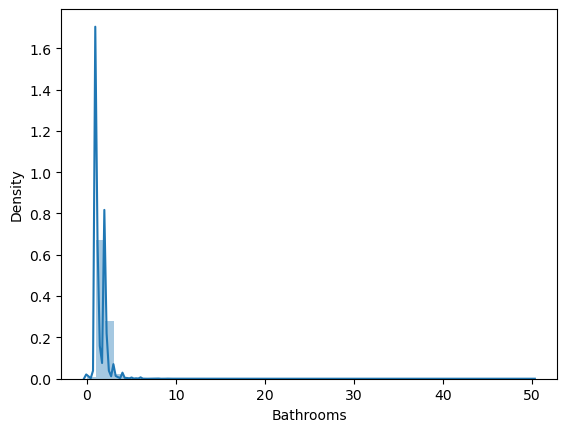

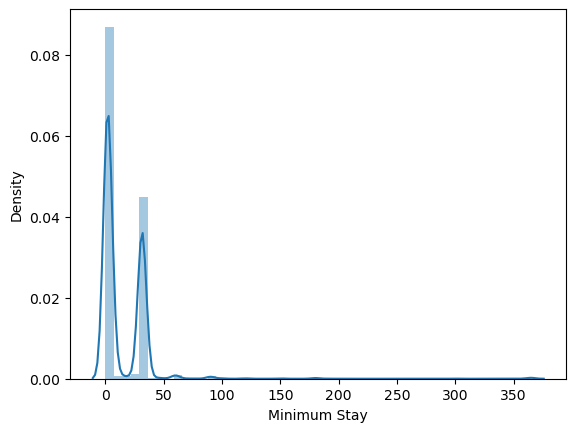

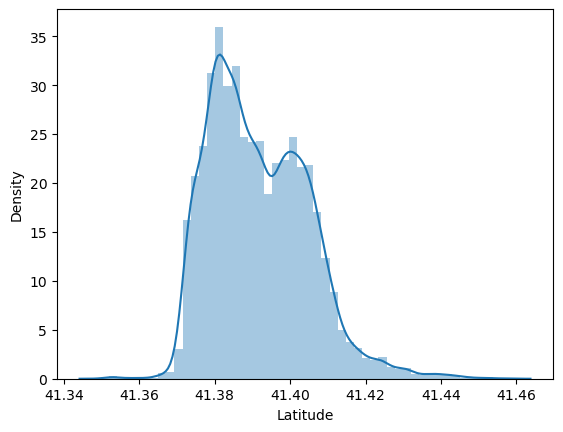

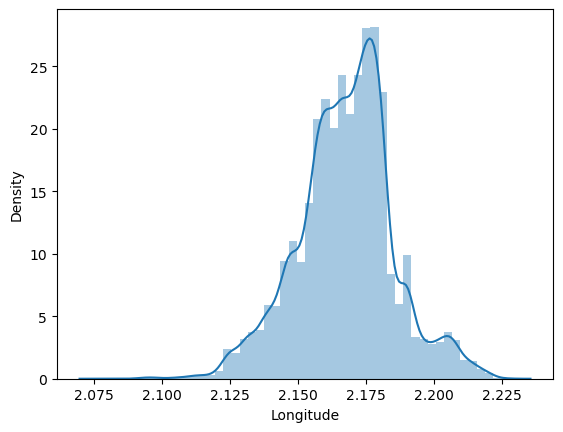

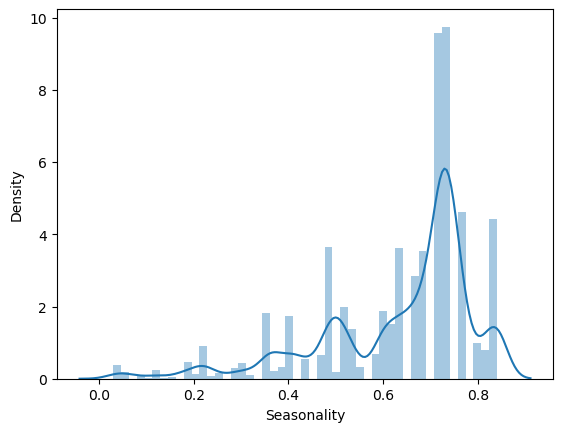

In [36]:
# Probability distributions

for col in numerical_columns.columns:
  sns.distplot(numerical_columns[col])
  plt.show()

<Axes: >

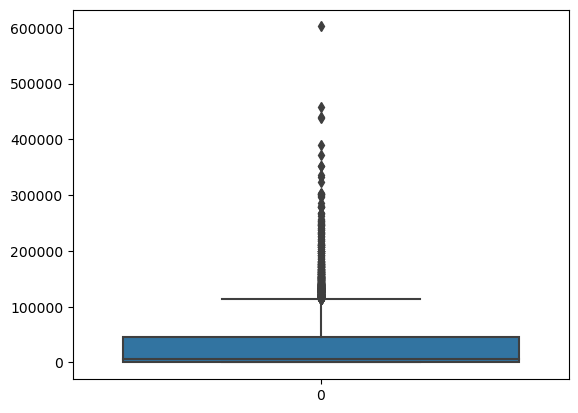

In [37]:
sns.boxplot(annual_df4["Annual Revenue"])

In [38]:
# Calculate the exact outliers range

IQR = abs(np.quantile(annual_df4["Annual Revenue"], .25) - np.quantile(annual_df4["Annual Revenue"], .75)) * 1.5
lower_boundary = np.quantile(annual_df4["Annual Revenue"], .25) - IQR
upper_boundary = np.quantile(annual_df4["Annual Revenue"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary

lower_boundary, upper_boundary

(-68016.0, 113360.0)

In [39]:
# Correlation between the features and the target

correlations_matrix = numerical_columns.corr()

correlations_matrix["Annual Revenue"].sort_values(ascending=False)

Annual Revenue        1.000000
Occupancy Rate        0.482713
Average Daily Rate    0.374894
Bedrooms              0.246512
Bathrooms             0.212899
Seasonality           0.072683
Latitude              0.017140
Longitude            -0.008796
Property ID          -0.241266
Minimum Stay         -0.315921
Name: Annual Revenue, dtype: float64

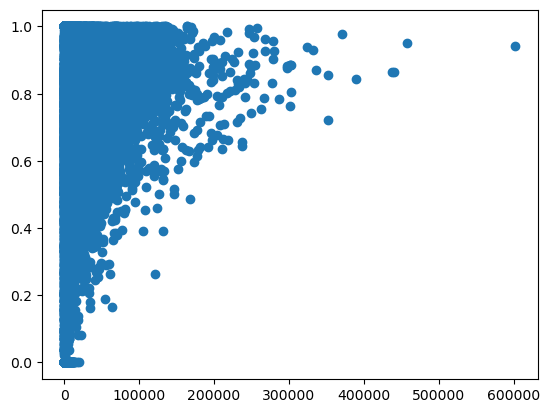

In [40]:
# Occupancy Rate has the highest correlation

plt.scatter(annual_df3["Annual Revenue"], annual_df3["Occupancy Rate"])

<Axes: xlabel='Neighborhood', ylabel='Annual Revenue'>

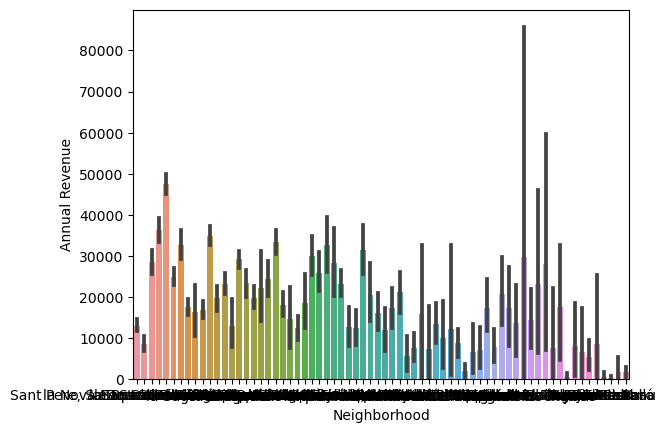

In [41]:
# For now, when analysing categorical we can use barplots

sns.barplot(x=annual_df3["Neighborhood"], y=annual_df3["Annual Revenue"])

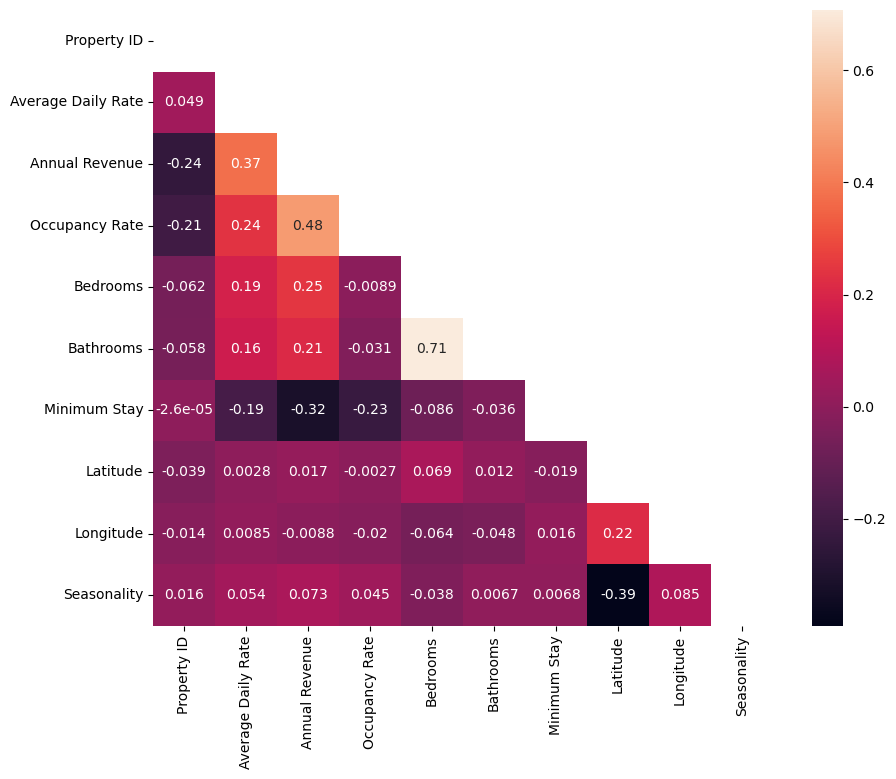

In [42]:
# Let's check the correlation amongst features - multicolinearity

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [43]:
# Create a copy

annual_final = annual_df4.copy()
annual_final

,Property ID,Neighborhood,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Seasonality
0,13969432,"Sant Pere, Santa Caterina i la Ribera",109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,False,False,True,False,False,0.76
1,13979120,la Barceloneta,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,True,False,True,False,False,0.60
2,13986464,la Nova Esquerra de l'Eixample,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,False,False,True,False,False,0.73
3,13992866,Sant Antoni,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,False,False,True,True,True,0.67
4,14004632,la Dreta de l'Eixample,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,False,False,True,False,False,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,el Poble Sec,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,False,False,True,False,False,0.49
15831,6724259,la Sagrada Família,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,False,False,True,False,False,0.72
15832,6726949,la Vila de Gràcia,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,False,False,True,False,False,0.64
15833,6776396,Sant Gervasi - Galvany,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,False,False,True,False,False,0.51


In [44]:
annual_final.to_csv('Cleaned dataset.csv', index=False)

In [45]:
# Encoding Categorical Variables

annual_final = pd.get_dummies(annual_final, drop_first=True)
annual_final

,Property ID,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,...,Neighborhood_la Salut,Neighborhood_la Teixonera,Neighborhood_la Trinitat Vella,Neighborhood_la Vall d'Hebron,Neighborhood_la Verneda i la Pau,Neighborhood_la Vila Olímpica del Poblenou,Neighborhood_la Vila de Gràcia,Neighborhood_les Corts,Neighborhood_les Roquetes,Neighborhood_les Tres Torres
0,13969432,109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,...,False,False,False,False,False,False,False,False,False,False
1,13979120,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,...,False,False,False,False,False,False,False,False,False,False
2,13986464,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,...,False,False,False,False,False,False,False,False,False,False
3,13992866,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,...,False,False,False,False,False,False,False,False,False,False
4,14004632,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,...,False,False,False,False,False,False,False,False,False,False
15831,6724259,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,...,False,False,False,False,False,False,False,False,False,False
15832,6726949,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,...,False,False,False,False,False,False,True,False,False,False
15833,6776396,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# X-y split

X = annual_final.drop(["Annual Revenue", "Property ID"], axis=1)
y = annual_final["Annual Revenue"]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,Average Daily Rate,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,...,Neighborhood_la Salut,Neighborhood_la Teixonera,Neighborhood_la Trinitat Vella,Neighborhood_la Vall d'Hebron,Neighborhood_la Verneda i la Pau,Neighborhood_la Vila Olímpica del Poblenou,Neighborhood_la Vila de Gràcia,Neighborhood_les Corts,Neighborhood_les Roquetes,Neighborhood_les Tres Torres
14302,178.28,0.560,2,1.0,False,2.0,41.379080,2.16613,False,False,...,False,False,False,False,False,False,False,False,False,False
3130,202.41,0.953,2,1.0,True,7.0,41.408720,2.17510,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,211.39,0.986,0,1.0,True,1.0,41.384800,2.17100,False,False,...,False,False,False,False,False,False,False,False,False,False
3931,180.07,0.564,1,1.0,False,2.0,41.377340,2.16273,True,False,...,False,False,False,False,False,False,False,False,False,False
2627,186.92,0.962,2,1.0,False,2.0,41.374330,2.14045,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,303.98,0.498,3,1.5,False,2.0,41.377411,2.14521,False,False,...,False,False,False,False,False,False,False,False,False,False
5390,345.35,0.111,3,2.5,False,32.0,41.384310,2.14527,False,False,...,False,False,False,False,False,False,False,False,False,False
860,190.28,1.000,1,1.0,False,32.0,41.405070,2.17387,False,False,...,False,False,False,False,False,False,False,False,False,False
15795,0.00,0.846,3,1.0,False,1.0,41.375980,2.15724,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Start the scaler object

scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage

scaler.fit(X_train)

# Transform training and the testing data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Start the model object

lm = LinearRegression()

# Fit the model object on the training set

lm.fit(X_train_scaled, y_train)

# Get predictions for the test set

predictions = lm.predict(X_test_scaled)

In [49]:
# Calculate your metrics

rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.39
RMSE: 29855.58467260448
MAE: 20373.953679651448


**Let's try and improve the model**

<Axes: xlabel='Annual Revenue'>

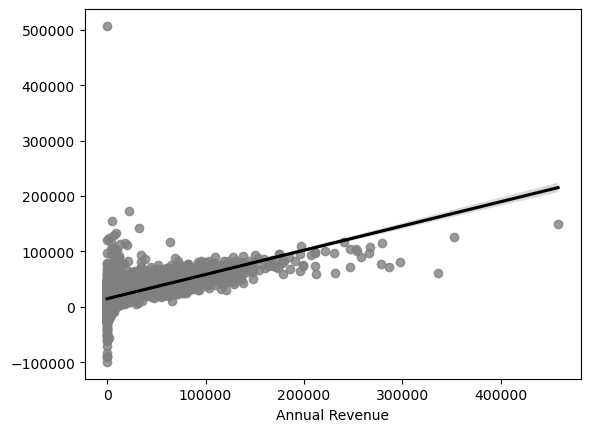

In [50]:
# A good place to start is by getting the regression plot from the predictions vs the true values

sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

In [51]:
# Log scaling

y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

y_train_scaled

14302     9.033484
3130     10.893791
2474     11.242599
3931     10.280930
2627     10.412471
           ...    
13418    10.361355
5390      5.843544
860       5.247024
15795     0.000000
7270      0.000000
Name: Annual Revenue, Length: 11084, dtype: float64

<Axes: xlabel='Annual Revenue', ylabel='Density'>

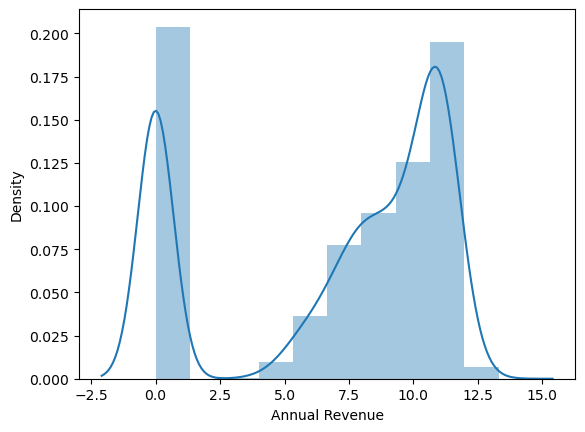

In [52]:
# Look at how log scaling changed the distribution

sns.distplot(y_train_scaled, bins=10)

<Axes: xlabel='Annual Revenue', ylabel='Density'>

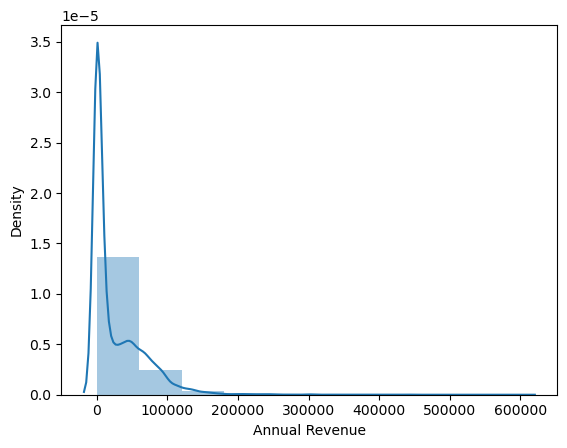

In [53]:
# Compared to what we had before scaling

sns.distplot(y_train, bins=10)

In [54]:
# Now let's check the model again

lm = LinearRegression()

lm.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [55]:
# Let's calculate R2 again

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: 0.66


<Axes: xlabel='Annual Revenue'>

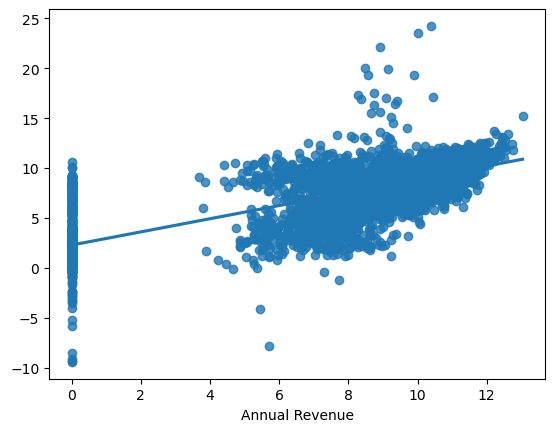

In [56]:
sns.color_palette("colorblind")
sns.regplot(x=y_test_scaled, y=predictions)

**Model has improved considerably, let's check how the models improves if we remove the outliers**

In [57]:
result_df = X_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = y_test_scaled - predictions
result_df.sort_values("error", ascending=False)

,Average Daily Rate,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,...,Neighborhood_la Vall d'Hebron,Neighborhood_la Verneda i la Pau,Neighborhood_la Vila Olímpica del Poblenou,Neighborhood_la Vila de Gràcia,Neighborhood_les Corts,Neighborhood_les Roquetes,Neighborhood_les Tres Torres,target,scaled_target,error
7063,29.91,0.066,2,1.0,False,365.0,41.415420,2.148000,False,False,...,False,False,False,False,False,False,False,299.0,5.700444,13.527625
4215,0.00,0.000,4,2.0,False,180.0,41.414640,2.190130,False,False,...,False,False,False,False,False,False,False,232.0,5.446737,9.501457
15587,0.00,0.000,2,1.5,False,365.0,41.393280,2.132548,False,False,...,False,False,False,False,False,False,True,0.0,0.000000,9.402923
15535,0.00,0.000,3,1.5,False,365.0,41.395422,2.139462,False,False,...,False,False,False,False,False,False,False,0.0,0.000000,9.333040
15484,0.00,0.000,2,2.0,False,365.0,41.392649,2.128571,False,False,...,False,False,False,False,False,False,False,0.0,0.000000,9.072298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10356,3116.13,1.000,3,2.0,False,2.0,41.390220,2.168600,False,True,...,False,False,False,False,False,False,False,9348.0,9.142918,-10.803339
9534,4829.05,0.036,6,4.0,False,1.0,41.380232,2.146778,False,False,...,False,False,False,False,False,False,False,4829.0,8.482395,-11.534663
10400,3706.85,1.000,3,2.0,False,2.0,41.403940,2.144820,False,False,...,False,False,False,False,False,False,False,7414.0,8.911125,-13.174780
4303,5598.50,0.083,4,4.5,False,2.0,41.378060,2.183490,True,False,...,False,False,False,False,False,False,False,22394.0,10.016548,-13.528341


In [58]:
df_no_outliers = annual_final[annual_final["Annual Revenue"] < 113360.0]
df_no_outliers

,Property ID,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,...,Neighborhood_la Salut,Neighborhood_la Teixonera,Neighborhood_la Trinitat Vella,Neighborhood_la Vall d'Hebron,Neighborhood_la Verneda i la Pau,Neighborhood_la Vila Olímpica del Poblenou,Neighborhood_la Vila de Gràcia,Neighborhood_les Corts,Neighborhood_les Roquetes,Neighborhood_les Tres Torres
0,13969432,109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,...,False,False,False,False,False,False,False,False,False,False
1,13979120,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,...,False,False,False,False,False,False,False,False,False,False
2,13986464,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,...,False,False,False,False,False,False,False,False,False,False
3,13992866,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,...,False,False,False,False,False,False,False,False,False,False
4,14004632,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,...,False,False,False,False,False,False,False,False,False,False
15831,6724259,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,...,False,False,False,False,False,False,False,False,False,False
15832,6726949,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,...,False,False,False,False,False,False,True,False,False,False
15833,6776396,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df_no_outliers[numerical_columns.columns] = df_no_outliers[numerical_columns.columns].applymap(lambda x: np.log(x) if x > 0 else 0) # this logic will work well as long as we don't have negative values
# .applymap() is similar to .apply() but it applies the function on the entire DataFrame

df_no_outliers

,Property ID,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,...,Neighborhood_la Salut,Neighborhood_la Teixonera,Neighborhood_la Trinitat Vella,Neighborhood_la Vall d'Hebron,Neighborhood_la Verneda i la Pau,Neighborhood_la Vila Olímpica del Poblenou,Neighborhood_la Vila de Gràcia,Neighborhood_les Corts,Neighborhood_les Roquetes,Neighborhood_les Tres Torres
0,16.452382,4.693089,6.079933,0.000000,0.000000,0.000000,False,3.465736,3.722858,0.780663,...,False,False,False,False,False,False,False,False,False,False
1,16.453075,4.564348,4.564348,0.000000,0.000000,0.000000,False,3.465736,3.722770,0.784285,...,False,False,False,False,False,False,False,False,False,False
2,16.453601,5.220086,9.883540,-0.234457,1.098612,0.000000,False,1.098612,3.722859,0.768959,...,False,False,False,False,False,False,False,False,False,False
3,16.454058,4.431412,6.040255,0.000000,1.098612,0.000000,True,3.465736,3.722750,0.770414,...,False,False,False,False,False,False,False,False,False,False
4,16.454899,5.771348,11.603223,-0.059750,0.693147,0.693147,False,0.693147,3.723103,0.776675,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,15.719997,0.000000,0.000000,-0.731888,0.693147,0.000000,False,0.000000,3.722651,0.772255,...,False,False,False,False,False,False,False,False,False,False
15831,15.721232,0.000000,0.000000,-0.262664,1.098612,0.693147,False,0.000000,3.723390,0.775746,...,False,False,False,False,False,False,False,False,False,False
15832,15.721632,0.000000,0.000000,-0.254892,0.693147,0.000000,False,0.000000,3.723488,0.769755,...,False,False,False,False,False,False,True,False,False,False
15833,15.728956,0.000000,0.000000,0.000000,0.693147,1.098612,False,0.000000,3.723255,0.763711,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# X-y split: here we keep only the data we will use to train the model
X = df_no_outliers.drop(["Annual Revenue", "Property ID"], axis=1) # check results without the multicolinear columns: "ic1", "ic2", "ic3", "hvp1"
y = df_no_outliers["Annual Revenue"]

In [61]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Train the model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
numerical_columns = df_no_outliers.select_dtypes("number")
categorical_columns = df_no_outliers.select_dtypes("object")

In [64]:
correlations_matrix = numerical_columns.corr()

correlations_matrix["Annual Revenue"].sort_values(ascending=False)

Annual Revenue        1.000000
Average Daily Rate    0.926438
Seasonality           0.039068
Bedrooms              0.035732
Latitude              0.000665
Bathrooms            -0.023033
Longitude            -0.024681
Property ID          -0.035799
Occupancy Rate       -0.116389
Minimum Stay         -0.437576
Name: Annual Revenue, dtype: float64

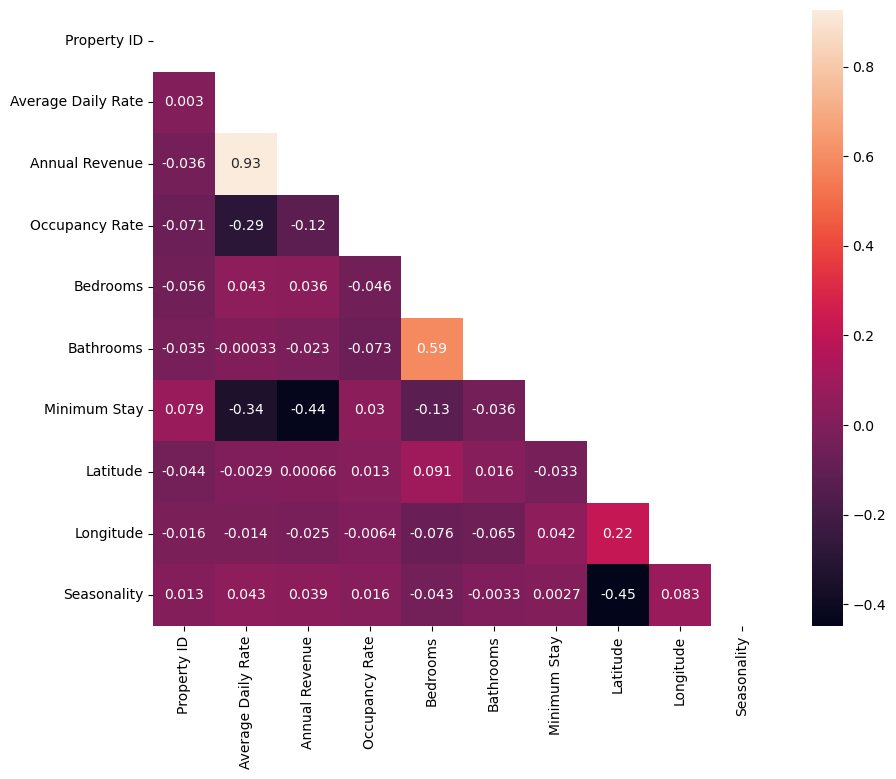

In [65]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [66]:
# Test the model

predictions = lm.predict(X_test)
print("R2_score:", round(r2_score(y_test, predictions), 2))

R2_score: 0.9


## Conclusions

**SQL queries**

In [67]:
!pip install pandasql
! pip install sqlalchemy
! pip install PyMySQL

In [68]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from pandasql import sqldf
import getpass  
password = getpass.getpass() 

········


In [69]:
df = pd.read_csv("/Users/clark/Desktop/ironhack/final-project/files/Cleaned dataset.csv", delimiter=",")
df

,Property ID,Neighborhood,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Seasonality
0,13969432,"Sant Pere, Santa Caterina i la Ribera",109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,False,False,True,False,False,0.76
1,13979120,la Barceloneta,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,True,False,True,False,False,0.60
2,13986464,la Nova Esquerra de l'Eixample,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,False,False,True,False,False,0.73
3,13992866,Sant Antoni,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,False,False,True,True,True,0.67
4,14004632,la Dreta de l'Eixample,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,False,False,True,False,False,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,el Poble Sec,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,False,False,True,False,False,0.49
15831,6724259,la Sagrada Família,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,False,False,True,False,False,0.72
15832,6726949,la Vila de Gràcia,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,False,False,True,False,False,0.64
15833,6776396,Sant Gervasi - Galvany,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,False,False,True,False,False,0.51


In [70]:
# (-68016.0, 113360.0) outliers

new_df = df[df['Annual Revenue'] <= 113360.0]

new_df

,Property ID,Neighborhood,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Seasonality
0,13969432,"Sant Pere, Santa Caterina i la Ribera",109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,False,False,True,False,False,0.76
1,13979120,la Barceloneta,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,True,False,True,False,False,0.60
2,13986464,la Nova Esquerra de l'Eixample,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,False,False,True,False,False,0.73
3,13992866,Sant Antoni,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,False,False,True,True,True,0.67
4,14004632,la Dreta de l'Eixample,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,False,False,True,False,False,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,el Poble Sec,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,False,False,True,False,False,0.49
15831,6724259,la Sagrada Família,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,False,False,True,False,False,0.72
15832,6726949,la Vila de Gràcia,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,False,False,True,False,False,0.64
15833,6776396,Sant Gervasi - Galvany,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,False,False,True,False,False,0.51


## Wich neighborhood has the highest average annual revenue?

In [71]:
query = """
    SELECT Neighborhood, AVG(`Annual Revenue`) AS `Total Annual Revenue`
    FROM new_df
    GROUP BY Neighborhood 
    ORDER BY `Total Annual Revenue` DESC
    LIMIT 1
"""

result = sqldf(query)
print(result, "€")

             Neighborhood  Total Annual Revenue
0  la Dreta de l'Eixample          32791.768566 €


## Which neighborhood has the property with the highest annual revenue?


In [72]:
query1 = """
    SELECT Neighborhood, "Annual Revenue"
    FROM new_df 
    WHERE "Annual Revenue" = (SELECT MAX("Annual Revenue") FROM new_df)
"""

result = sqldf(query1)
print(result, "€")

             Neighborhood  Annual Revenue
0  la Dreta de l'Eixample        113322.0 €


## What features does the property with the highest revenue have?

In [73]:
query2 = """
    SELECT Neighborhood, "Annual Revenue", "Average Daily Rate", Bedrooms, "Pets Allowed", "Has Pool", "Has Air Conditioning", "Has Parking", "Has Terrace", "Airbnb Superhost"
    FROM new_df 
    WHERE "Annual Revenue" = (SELECT MAX("Annual Revenue") FROM new_df)
"""

result = sqldf(query2)
print(result)

             Neighborhood  Annual Revenue  Average Daily Rate  Bedrooms  \
0  la Dreta de l'Eixample        113322.0              370.33         2   

   Pets Allowed  Has Pool  Has Air Conditioning  Has Parking  Has Terrace  \
0             0         0                     1            1            0   

   Airbnb Superhost  
0                 0  


## How many neighborhoods are they in Barcelona?

In [74]:
query3 = """
    SELECT COUNT(DISTINCT Neighborhood) AS "Total Number of Neighborhoods"
    FROM new_df 
"""

result = sqldf(query3)
print(result)

   Total Number of Neighborhoods
0                             68


## How many properties did we analyse?

In [75]:
# Here we are looking at the initial dataset before removing the outliers

query3 = """
    SELECT COUNT(DISTINCT "Property ID") AS "Total Number of Properties"
    FROM df 
"""

result = sqldf(query3)
print(result)

   Total Number of Properties
0                       15835


**Jupyter Notebook**

## Which neighborhoods have the highest average annual revenue?

In [76]:
neighborhood_avg_revenue = new_df.groupby('Neighborhood')['Annual Revenue'].mean().sort_values(ascending=False)
print("Neighborhoods with highest average annual revenue:")
print(neighborhood_avg_revenue.head())

Neighborhoods with highest average annual revenue:
Neighborhood
la Dreta de l'Eixample    32791.768566
Sant Antoni               32465.060942
la Sagrada Família        31247.501461
el Fort Pienc             30292.359268
la Vila de Gràcia         27823.816239
Name: Annual Revenue, dtype: float64


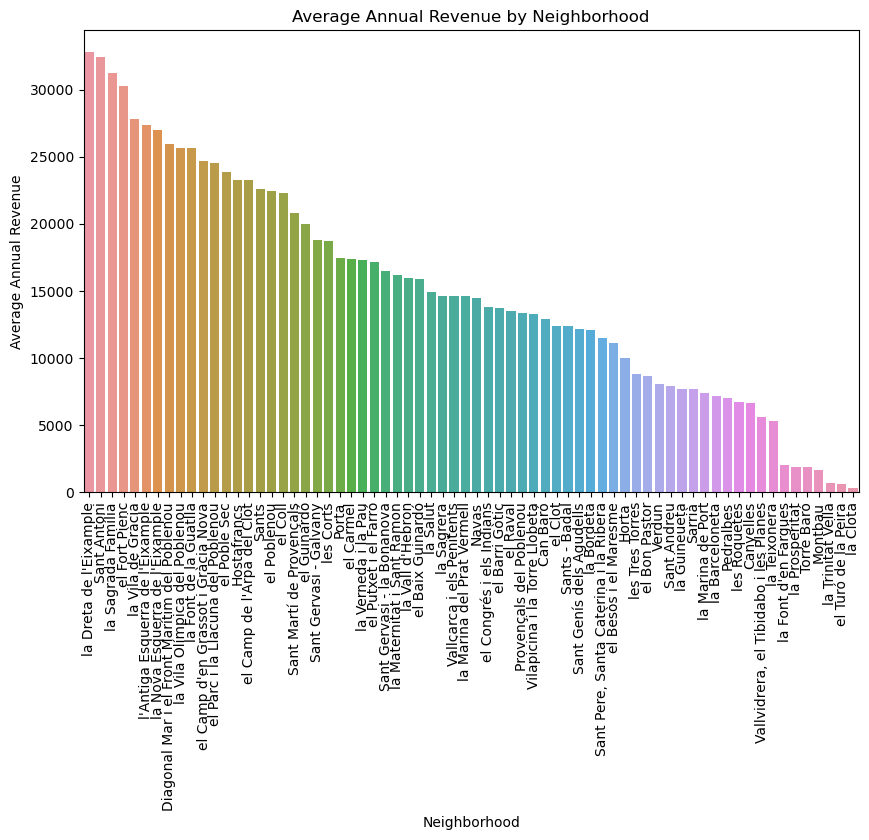

In [77]:
# Plotting average annual revenue across different neighborhoods

plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_avg_revenue.index, y=neighborhood_avg_revenue.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Annual Revenue')
plt.title('Average Annual Revenue by Neighborhood')
plt.show()


## Are there neighborhoods with high demand but lower competition?


Neighborhoods with high demand but lower competition:
Neighborhood
la Marina del Prat Vermell    0.034954
la Verneda i la Pau           0.033903
la Marina de Port             0.029139
Porta                         0.026559
la Prosperitat                0.021142
Name: Occupancy_to_Property_Ratio, dtype: float64


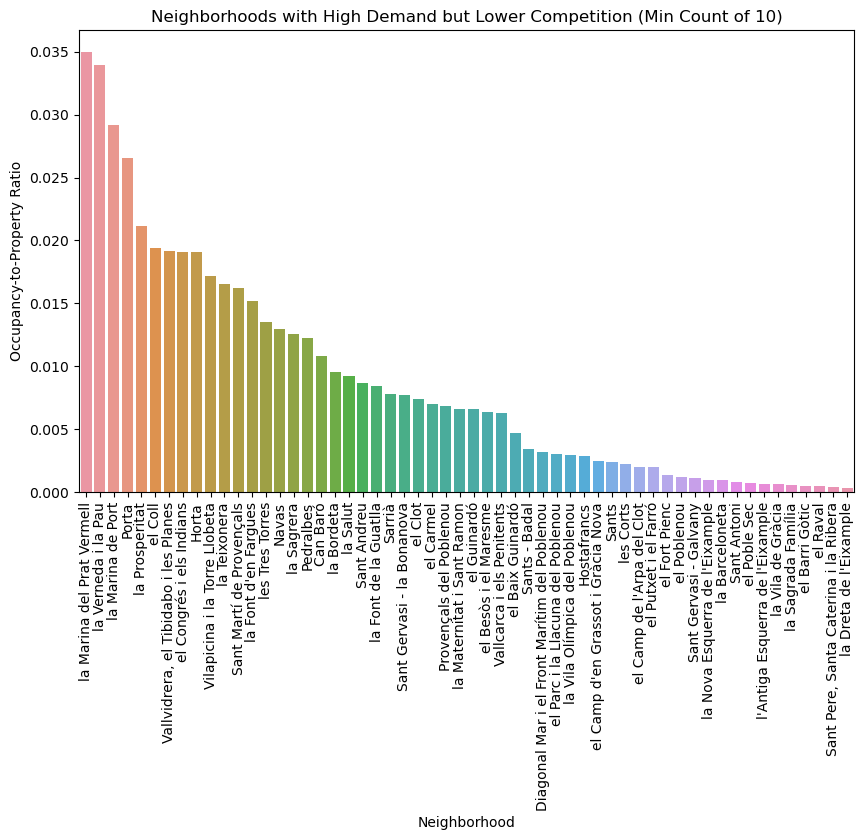

In [78]:
# Filter out neighborhoods with fewer than 10 properties
neighborhood_counts = new_df['Neighborhood'].value_counts()
valid_neighborhoods = neighborhood_counts[neighborhood_counts >= 10].index

# Filter new_df to include only properties in valid neighborhoods
filtered_df = new_df[new_df['Neighborhood'].isin(valid_neighborhoods)]

# Add a new column for occupancy-to-property ratio
filtered_df['Occupancy_to_Property_Ratio'] = filtered_df['Occupancy Rate'] / filtered_df.groupby('Neighborhood')['Property ID'].transform('count')

# Sort neighborhoods based on the occupancy-to-property ratio
neighborhood_demand = filtered_df.groupby('Neighborhood')['Occupancy_to_Property_Ratio'].mean().sort_values(ascending=False)
print("Neighborhoods with high demand but lower competition:")
print(neighborhood_demand.head())

# Plotting demand-to-competition ratio across different neighborhoods
plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_demand.index, y=neighborhood_demand.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Occupancy-to-Property Ratio')
plt.title('Neighborhoods with High Demand but Lower Competition (Min Count of 10)')
plt.show()


## Combinations of property characteristics and amenities


In [79]:
# Group the data by neighborhood and combinations of property characteristics and amenities
neighborhood_combinations = new_df.groupby(['Neighborhood', 'Bedrooms', 'Bathrooms', 'Airbnb Superhost', 
                                        'Minimum Stay', 'Pets Allowed', 'Has Pool', 
                                        'Has Air Conditioning', 'Has Parking', 'Has Terrace'])['Annual Revenue'].mean().reset_index()

# Sort combinations within each neighborhood by mean annual revenue
sorted_neighborhood_combinations = neighborhood_combinations.sort_values(by=['Neighborhood', 'Annual Revenue'], ascending=[True, False])

# Get the best combination for each neighborhood
best_combinations_by_neighborhood = sorted_neighborhood_combinations.groupby('Neighborhood').first().reset_index()

# Convert the output to a DataFrame
best_combinations_df = pd.DataFrame(best_combinations_by_neighborhood)

best_combinations_df


,Neighborhood,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Annual Revenue
0,Can Baró,3,2.0,True,3.0,False,False,True,True,True,69691.0
1,Canyelles,3,1.0,True,2.0,False,False,True,False,False,17225.0
2,Diagonal Mar i el Front Marítim del Poblenou,3,2.0,False,2.0,True,False,True,True,True,108206.0
3,Horta,3,1.5,False,1.0,False,False,True,True,True,51583.0
4,Hostafrancs,3,2.0,False,2.0,False,False,True,False,False,99457.0
...,...,...,...,...,...,...,...,...,...,...,...
63,la Vila Olímpica del Poblenou,3,3.5,True,1.0,False,False,True,True,False,110745.0
64,la Vila de Gràcia,2,2.0,True,1.0,False,False,True,False,False,112645.0
65,les Corts,3,2.0,True,1.0,False,False,True,False,False,108968.0
66,les Roquetes,1,1.0,True,6.0,False,False,True,True,True,28546.0


In [80]:
best_combinations_df.to_csv("best combinations.csv", index=False)

## Which ameneties impact the most to the Annual Revenue


In [81]:
new_df1 = new_df.copy()

In [82]:
def calc_avg_revenue(df):
    amenities = ['Pets Allowed', 'Has Pool', 'Has Air Conditioning', 'Has Parking', 'Has Terrace']
    result = {}
    for amenity in amenities:
        result[amenity] = {
            'With Amenity': df[df[amenity] == True]['Annual Revenue'].mean(),
            'Without Amenity': df[df[amenity] == False]['Annual Revenue'].mean()
        }
    return pd.DataFrame(result)

# Apply the function to the entire DataFrame
result = calc_avg_revenue(new_df1)

# Display the result
print(result)

                 Pets Allowed      Has Pool  Has Air Conditioning  \
With Amenity     18390.985901  15406.226766          22812.086143   
Without Amenity  23099.116227  22607.451582           4467.997951   

                  Has Parking   Has Terrace  
With Amenity     28860.790283  29062.863531  
Without Amenity  18286.101714  16599.096970  
